# 1. Import and Install Dependencies

In [93]:
pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python mediapipe sklearn matplotlib pyttsx3

Note: you may need to restart the kernel to use updated packages.


In [94]:
#!pip install pyttsx3

In [95]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp 


In [103]:
import pyttsx3

# 2. Keypoints using MP Holistic

In [99]:
#

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [11]:
draw_landmarks(frame, results)

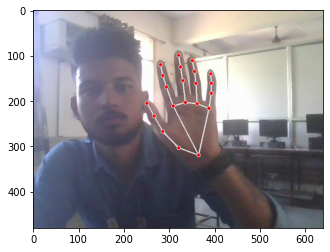

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [16]:

for res in results.left_hand_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    

In [17]:

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
lh


array([ 5.70790291e-01,  6.64696276e-01,  3.46890829e-07,  5.02597570e-01,
        6.31332517e-01, -2.27322653e-02,  4.47782278e-01,  5.58042705e-01,
       -2.91643031e-02,  4.17696089e-01,  4.87347901e-01, -3.43068801e-02,
        3.93170416e-01,  4.28624183e-01, -3.82076316e-02,  4.83759284e-01,
        4.39815223e-01, -2.95979576e-03,  4.60597932e-01,  3.52779269e-01,
       -1.64671466e-02,  4.48309600e-01,  3.00194025e-01, -3.04658357e-02,
        4.40086484e-01,  2.51234710e-01, -4.16014418e-02,  5.26067853e-01,
        4.23600793e-01, -5.52044949e-03,  5.15650570e-01,  3.24216396e-01,
       -1.42434351e-02,  5.08348405e-01,  2.61952698e-01, -2.65798550e-02,
        5.02011716e-01,  2.07487404e-01, -3.68840694e-02,  5.66219568e-01,
        4.29382384e-01, -1.29839126e-02,  5.62035263e-01,  3.37087452e-01,
       -2.49547306e-02,  5.56788206e-01,  2.81287134e-01, -3.49885896e-02,
        5.49157977e-01,  2.31330350e-01, -4.30981293e-02,  6.06492758e-01,
        4.51737702e-01, -

In [20]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [22]:
result_test = extract_keypoints(results)

In [23]:
result_test

array([ 5.70790291e-01,  6.64696276e-01,  3.46890829e-07,  5.02597570e-01,
        6.31332517e-01, -2.27322653e-02,  4.47782278e-01,  5.58042705e-01,
       -2.91643031e-02,  4.17696089e-01,  4.87347901e-01, -3.43068801e-02,
        3.93170416e-01,  4.28624183e-01, -3.82076316e-02,  4.83759284e-01,
        4.39815223e-01, -2.95979576e-03,  4.60597932e-01,  3.52779269e-01,
       -1.64671466e-02,  4.48309600e-01,  3.00194025e-01, -3.04658357e-02,
        4.40086484e-01,  2.51234710e-01, -4.16014418e-02,  5.26067853e-01,
        4.23600793e-01, -5.52044949e-03,  5.15650570e-01,  3.24216396e-01,
       -1.42434351e-02,  5.08348405e-01,  2.61952698e-01, -2.65798550e-02,
        5.02011716e-01,  2.07487404e-01, -3.68840694e-02,  5.66219568e-01,
        4.29382384e-01, -1.29839126e-02,  5.62035263e-01,  3.37087452e-01,
       -2.49547306e-02,  5.56788206e-01,  2.81287134e-01, -3.49885896e-02,
        5.49157977e-01,  2.31330350e-01, -4.30981293e-02,  6.06492758e-01,
        4.51737702e-01, -

In [24]:
np.save('0', result_test)

In [25]:
np.load('0.npy')

array([ 5.70790291e-01,  6.64696276e-01,  3.46890829e-07,  5.02597570e-01,
        6.31332517e-01, -2.27322653e-02,  4.47782278e-01,  5.58042705e-01,
       -2.91643031e-02,  4.17696089e-01,  4.87347901e-01, -3.43068801e-02,
        3.93170416e-01,  4.28624183e-01, -3.82076316e-02,  4.83759284e-01,
        4.39815223e-01, -2.95979576e-03,  4.60597932e-01,  3.52779269e-01,
       -1.64671466e-02,  4.48309600e-01,  3.00194025e-01, -3.04658357e-02,
        4.40086484e-01,  2.51234710e-01, -4.16014418e-02,  5.26067853e-01,
        4.23600793e-01, -5.52044949e-03,  5.15650570e-01,  3.24216396e-01,
       -1.42434351e-02,  5.08348405e-01,  2.61952698e-01, -2.65798550e-02,
        5.02011716e-01,  2.07487404e-01, -3.68840694e-02,  5.66219568e-01,
        4.29382384e-01, -1.29839126e-02,  5.62035263e-01,  3.37087452e-01,
       -2.49547306e-02,  5.56788206e-01,  2.81287134e-01, -3.49885896e-02,
        5.49157977e-01,  2.31330350e-01, -4.30981293e-02,  6.06492758e-01,
        4.51737702e-01, -

# 4. Setup Folders for Collection

In [26]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','one','two','three'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [27]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [28]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'one': 3, 'two': 4, 'three': 5}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\hello\\30\\0.npy'

In [38]:
np.array(sequences).shape

(24, 30, 126)

In [39]:
np.array(labels).shape

(24,)

In [40]:
X = np.array(sequences)

In [41]:
X.shape

(24, 30, 126)

In [42]:
y = to_categorical(labels).astype(int)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [44]:
y_test.shape

(2, 1)

# 7. Build and Train LSTM Neural Network

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [55]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [58]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


ValueError: in user code:

    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\mkfun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            48896     
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 6)                 198       
                                                                 
Total params: 203,558
Trainable params: 203,558
Non-tr

# 8. Make Predictions

In [60]:
res = model.predict(X_test)

In [62]:
actions[np.argmax(res[4])]

IndexError: index 4 is out of bounds for axis 0 with size 2

In [63]:
actions[np.argmax(y_test[4])]

IndexError: index 4 is out of bounds for axis 0 with size 2

# 9. Save Weights

In [64]:
model.save('action.h5')

In [65]:
#

In [66]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [67]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [68]:
yhat = model.predict(X_test)

In [69]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [70]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0., 0.],
        [2., 0.]],

       [[0., 2.],
        [0., 0.]]])

In [71]:
accuracy_score(ytrue, yhat)

0.0

# 11. Test in Real Time

In [72]:
from scipy import stats

In [106]:
colors = [(245,117,16), (117,245,16), (16,117,245),(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
   
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    text_speech = pyttsx3.init()
    INPUT = text_speech
    text_speech.say(INPUT)
    text_speech.runAndWait()   
    return output_frame

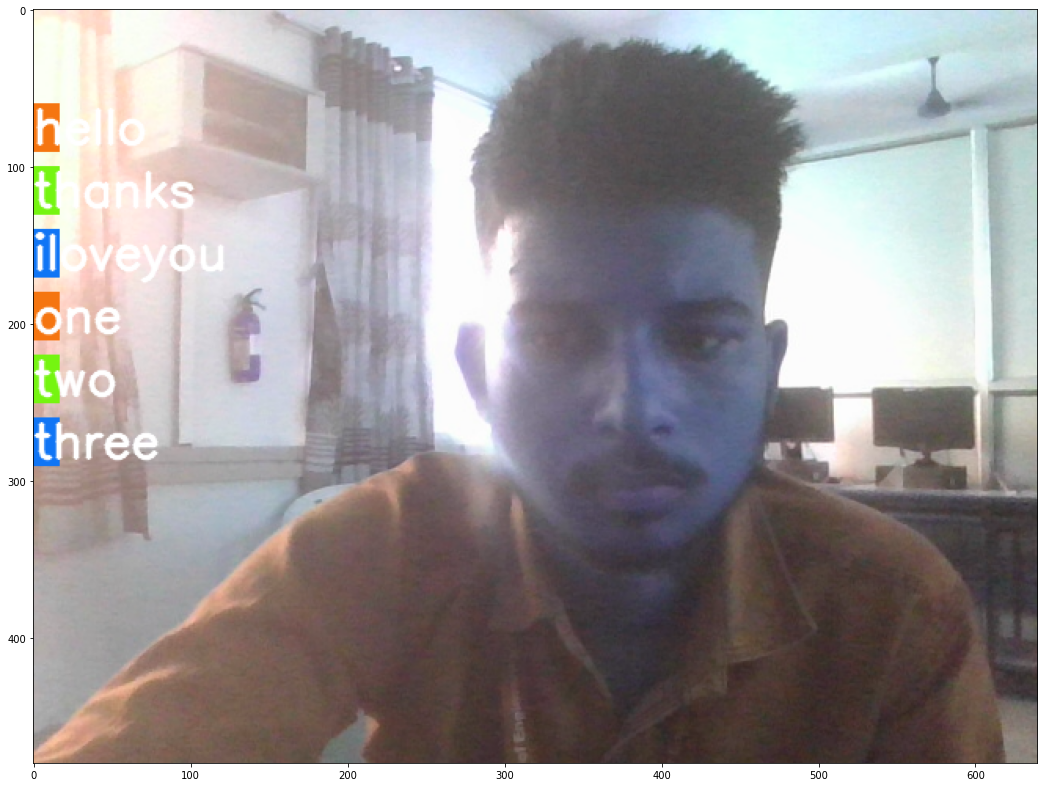

In [77]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [107]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

ModuleNotFoundError: No module named 'pywintypes'